In [1]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

In [2]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd

In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_poissonVI_embedding.h5ad")

In [4]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

In [5]:
new_annotation = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/refined_annotation.csv")

In [6]:
new_annotation.set_index("Unnamed: 0", inplace=True)

In [7]:
adata.obs["celltype_refined"] = new_annotation["celltype_refined"].astype("category")

In [8]:
adata.obs["delta_pull_thresholded"] = new_annotation["delta_pull_thresholded"].astype("category")

In [9]:
endocrine_celltypes = [
    "Ductal",
    "Prlf. Ductal",
    "Ngn3 low",
    "Ngn3 high",
    "Ngn3 high cycling",
    "Fev+",
    "Fev+ Alpha",
    "Fev+ Beta",
    "Fev+ Delta",
    "Eps/Delta progenitors",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
]

In [10]:
adata_red = adata[adata.obs["celltype"].isin(endocrine_celltypes)]

In [11]:
adata_removed = adata[~adata.obs["celltype"].isin(endocrine_celltypes)]

In [12]:
adata_removed.obs["celltype"].cat.categories

Index(['Imm. Acinar', 'Mat. Acinar'], dtype='object')

In [13]:
adata = adata_red.copy()

In [14]:
sc.tl.umap(adata)

/home/icb/dominik.klein/miniconda3/envs/jax_gpu2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


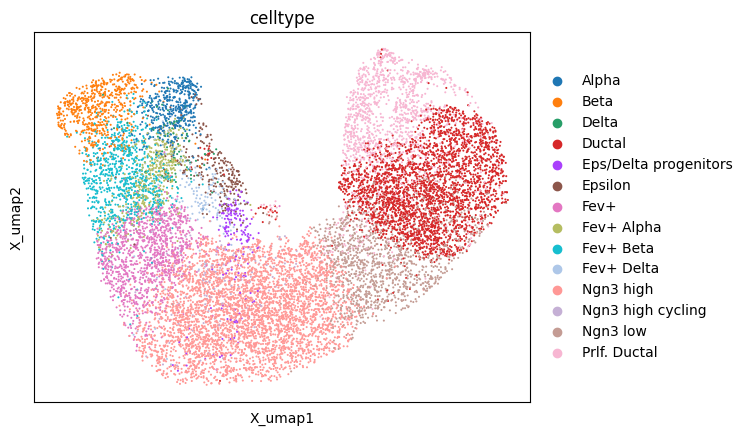

In [15]:
sc.pl.embedding(adata, basis="X_umap", color="celltype")

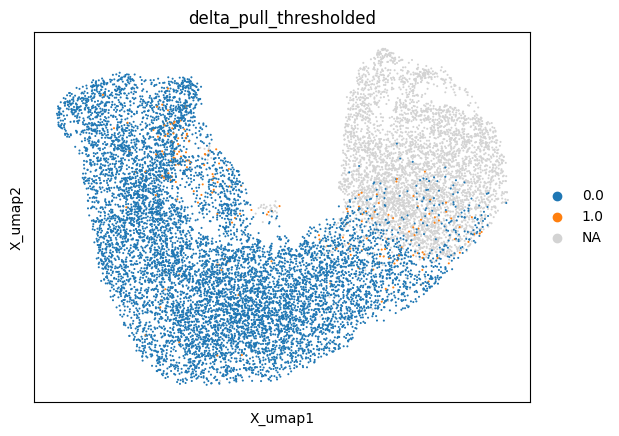

In [16]:
sc.pl.embedding(adata, basis="X_umap", color="delta_pull_thresholded")

In [17]:
tp0 = TemporalProblem(adata)
tp0 = tp0.prepare("time", joint_attr="X_poiss_vi")

In [18]:
tp0 = tp0.solve(epsilon=1e-2, scale_cost="mean")

In [19]:
import moscot.plotting as mpl

In [20]:
ct_desc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype_refined", late_annotation="celltype_refined", forward=True)

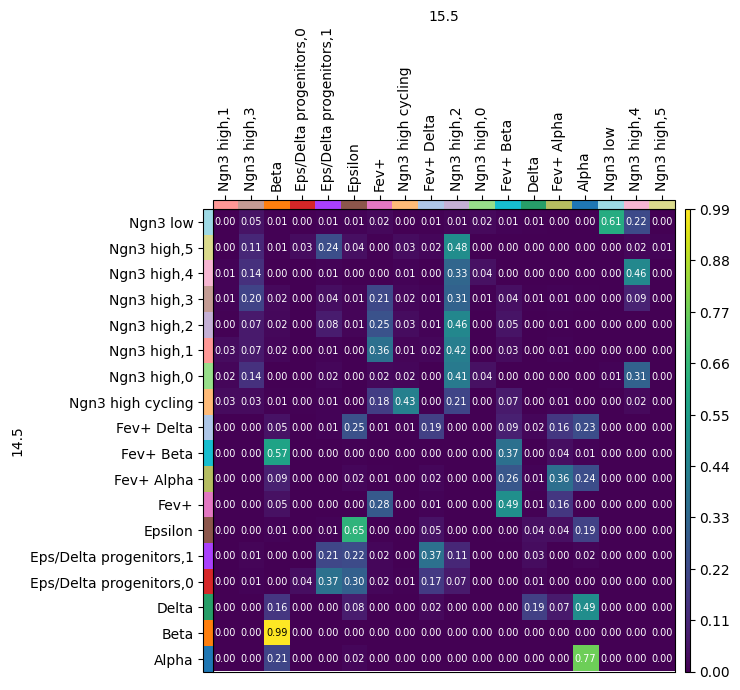

In [21]:
mpl.cell_transition(tp0, dpi=100, fontsize=7)

In [22]:
ct_desc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype_refined", late_annotation="celltype_refined", forward=False)

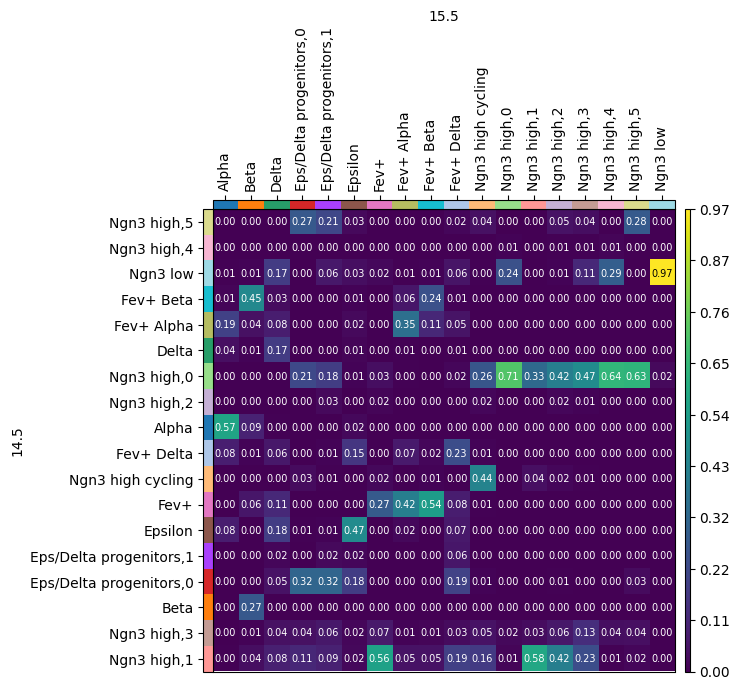

In [23]:
mpl.cell_transition(tp0, dpi=100, fontsize=7)

In [24]:
tp0.push(14.5, 15.5, data="celltype_refined", subset="Eps/Delta progenitors,0")

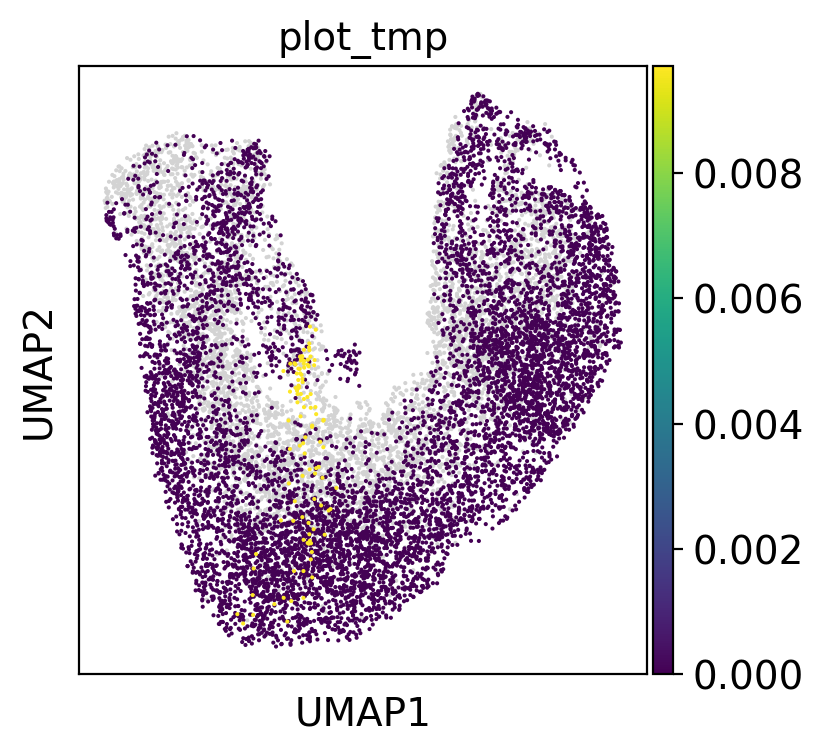

In [25]:
mpl.push(tp0, time_points=[14.5])

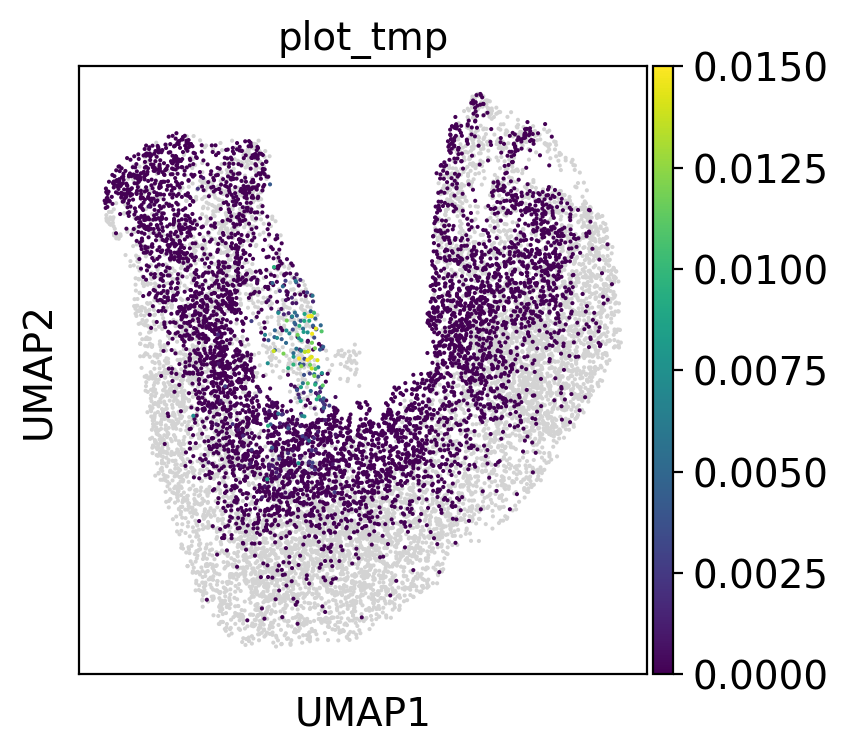

In [26]:
mpl.push(tp0, time_points=[15.5])

In [27]:
tp0.push(14.5, 15.5, data="celltype_refined", subset="Eps/Delta progenitors,1")

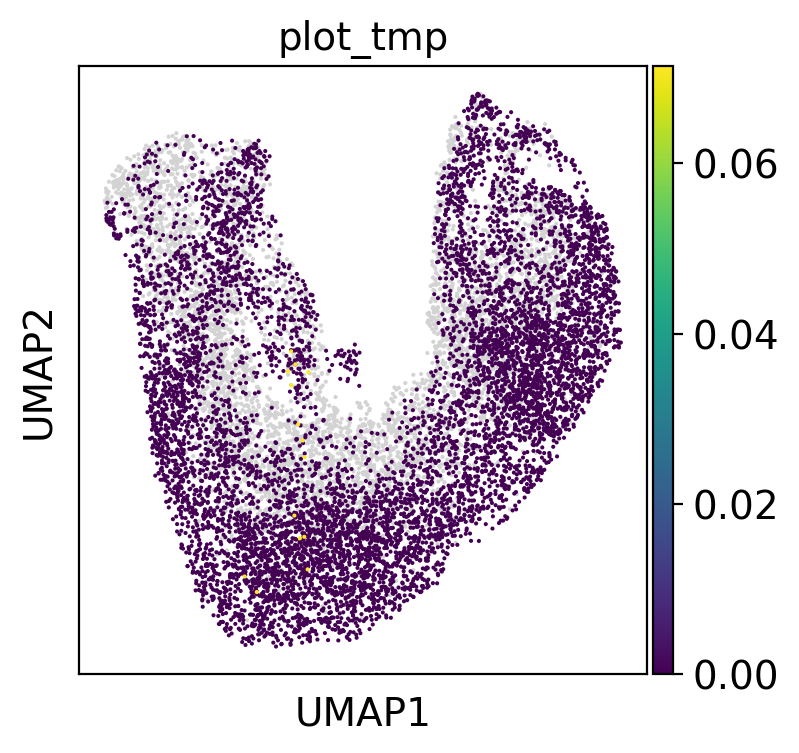

In [28]:
mpl.push(tp0, time_points=[14.5])

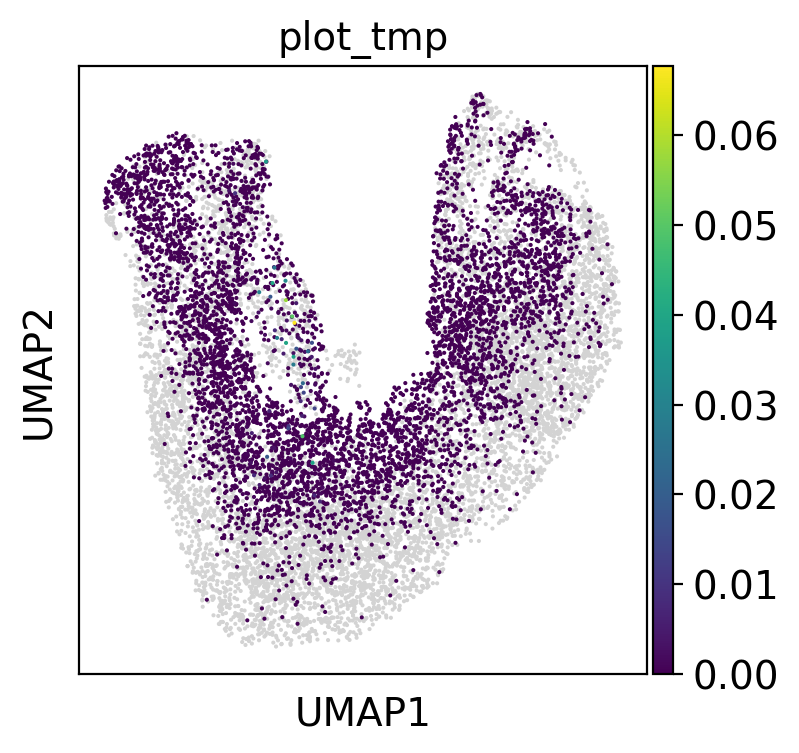

In [29]:
mpl.push(tp0, time_points=[15.5])

In [30]:

tp0.pull(14.5, 15.5, data="celltype_refined", subset="Epsilon")

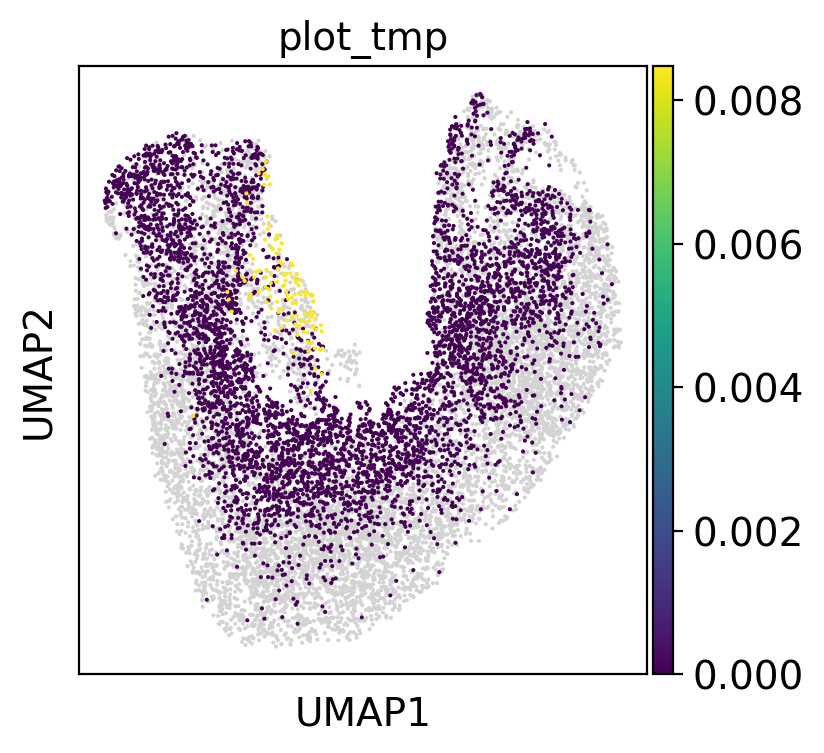

In [31]:
mpl.pull(tp0, time_points=[15.5])

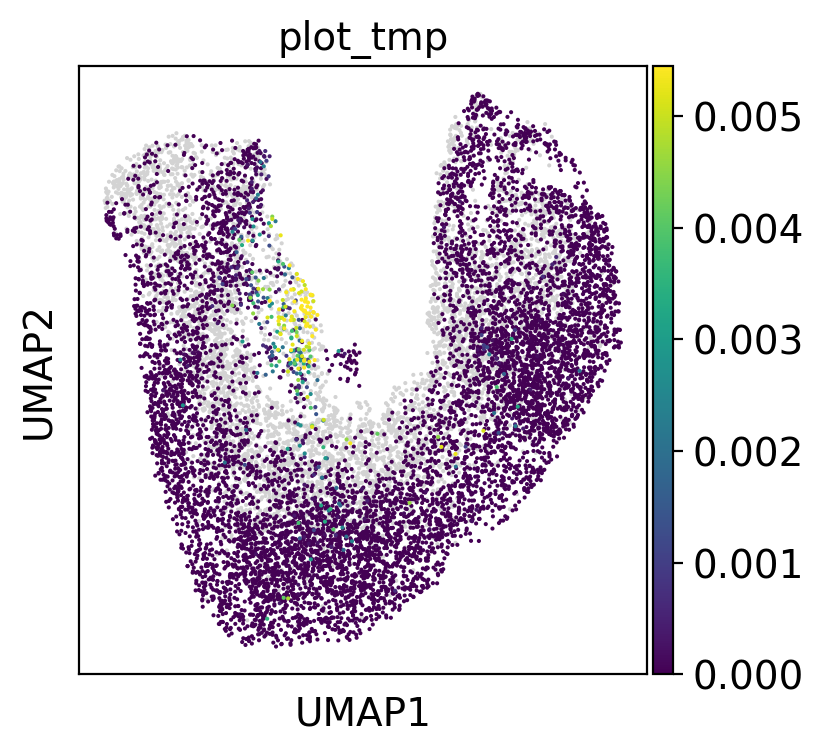

In [32]:
mpl.pull(tp0, time_points=[14.5])

In [33]:

tp0.pull(14.5, 15.5, data="celltype_refined", subset="Delta")

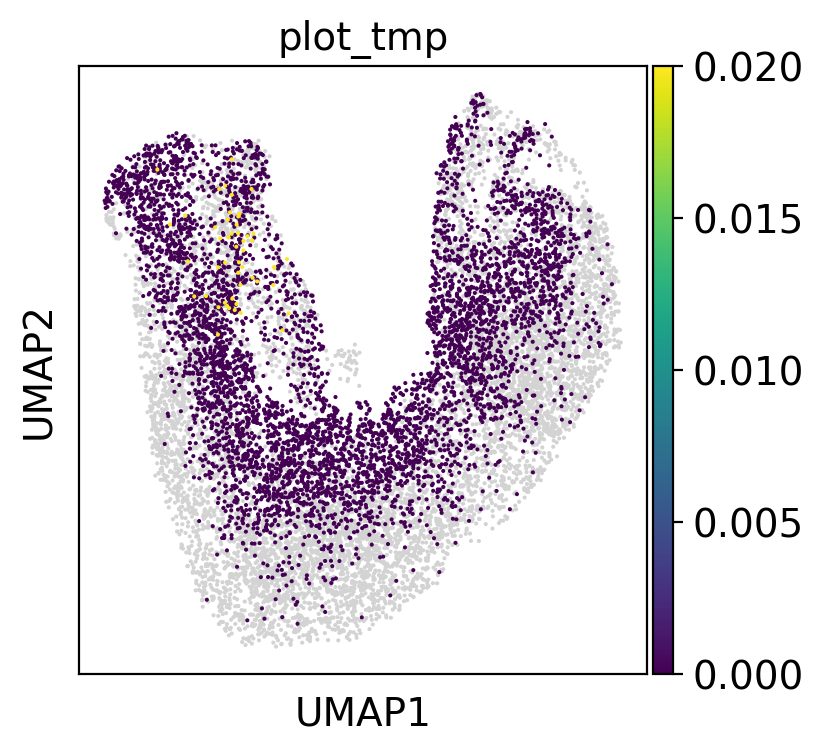

In [34]:
mpl.pull(tp0, time_points=[15.5])

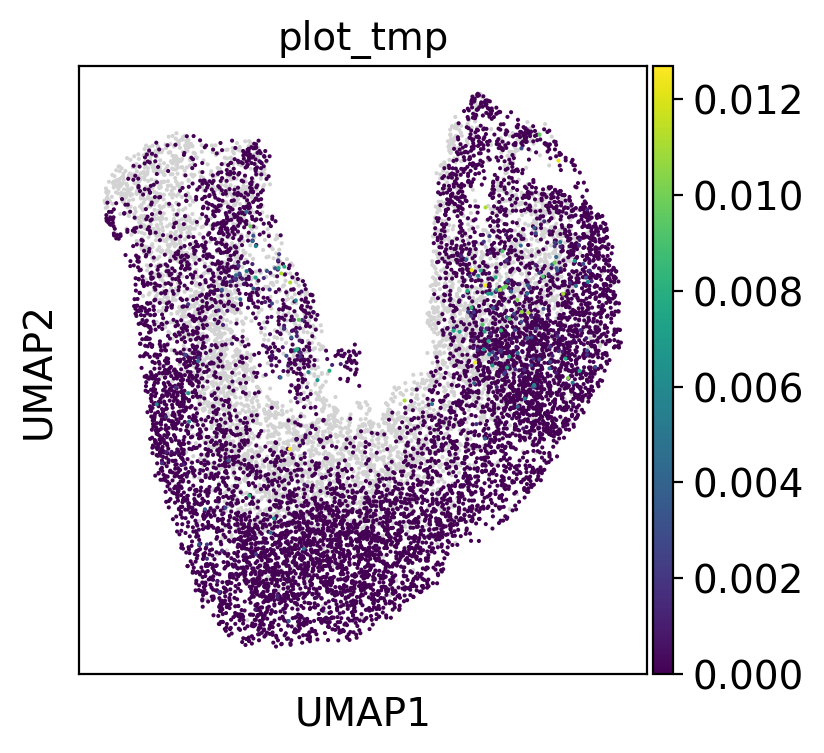

In [35]:
mpl.pull(tp0, time_points=[14.5])

In [36]:
tp0.pull(14.5, 15.5, data="celltype_refined", subset="Fev+ Delta")

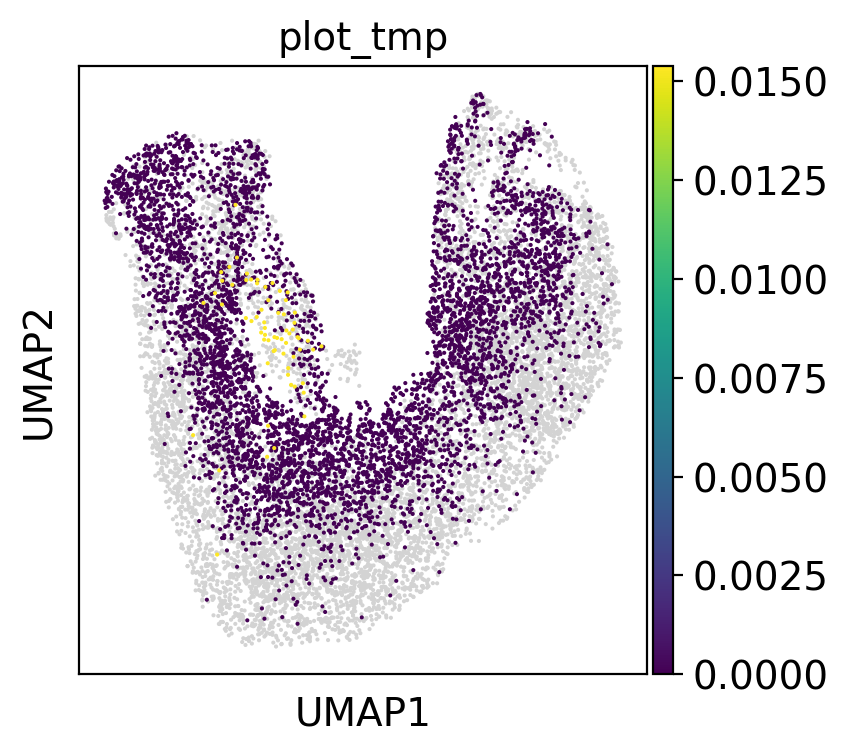

In [37]:
mpl.pull(tp0, time_points=[15.5])

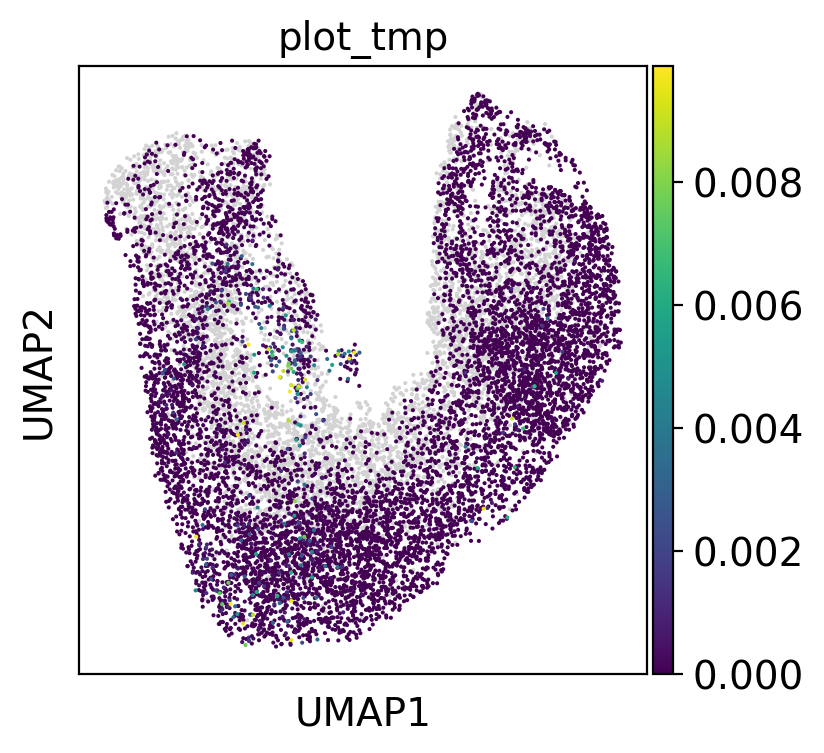

In [38]:
mpl.pull(tp0, time_points=[14.5])

In [39]:
adata.obs["tmp_3"] = new_annotation["tmp_3"]